## Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Creating Dummy Dataset

In [63]:

# Reproducible
np.random.seed(42)
n = 5000

# Features
interest_rate = np.round(np.random.normal(loc=3.5, scale=1.0, size=n).clip(0.5, 8.0), 2)
unemployment_rate = np.round(np.random.normal(loc=6.0, scale=1.2, size=n).clip(2.0, 12.0), 2)

# Very small noise for high correlation
noise = np.random.normal(0, 5, size=n)

# Strong linear relationship
index_price = (
    1000
    - 80 * interest_rate       # strong negative relation
    - 40 * unemployment_rate   # strong negative relation
    + noise                    # just a little randomness
)

# Keep positive
index_price = np.round(np.maximum(index_price, 100), 2)

# Build DataFrame
df = pd.DataFrame({
    "interest_rate": interest_rate,
    "unemployment_rate": unemployment_rate,
    "index_price": index_price
})

print(df.head())
print("\nCorrelation matrix:\n", df.corr())


   interest_rate  unemployment_rate  index_price
0           4.00               5.49       457.01
1           3.36               5.46       511.27
2           4.15               3.85       511.01
3           5.02               5.60       374.95
4           3.27               6.88       469.19

Correlation matrix:
                    interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.001973    -0.852899
unemployment_rate      -0.001973           1.000000    -0.517643
index_price            -0.852899          -0.517643     1.000000


In [64]:
df.head()

,interest_rate,unemployment_rate,index_price
0,4.00,5.49,457.01
1,3.36,5.46,511.27
2,4.15,3.85,511.01
3,5.02,5.60,374.95
4,3.27,6.88,469.19


In [65]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.001973,-0.852899
unemployment_rate,-0.001973,1.000000,-0.517643
index_price,-0.852899,-0.517643,1.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      5000 non-null   float64
 1   unemployment_rate  5000 non-null   float64
 2   index_price        5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


In [67]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,5000.000000,5000.000000,5000.000000
mean,3.505690,5.988544,480.055806
std,0.996129,1.211121,93.337945
min,0.500000,2.000000,143.980000
25%,2.840000,5.180000,417.190000
50%,3.510000,5.980000,480.310000
75%,4.170000,6.810000,540.607500
max,7.430000,10.230000,839.700000


In [68]:
df

,interest_rate,unemployment_rate,index_price
0,4.00,5.49,457.01
1,3.36,5.46,511.27
2,4.15,3.85,511.01
3,5.02,5.60,374.95
4,3.27,6.88,469.19
...,...,...,...
4995,3.45,7.56,417.05
4996,4.21,3.60,525.39
4997,6.61,5.15,271.76
4998,4.31,6.59,387.18


In [69]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## Visualization

In [70]:
import seaborn as sns

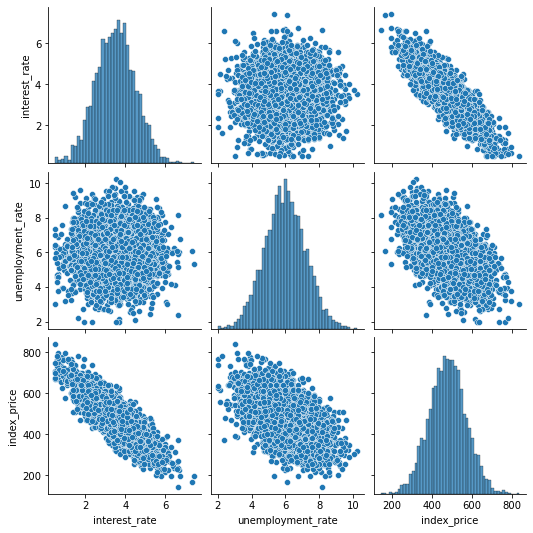

In [71]:
sns.pairplot(df)

In [72]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.001973,-0.852899
unemployment_rate,-0.001973,1.000000,-0.517643
index_price,-0.852899,-0.517643,1.000000


In [73]:
## Visualize Data point moreclosely 

Text(0, 0.5, 'Unemployment Rate')

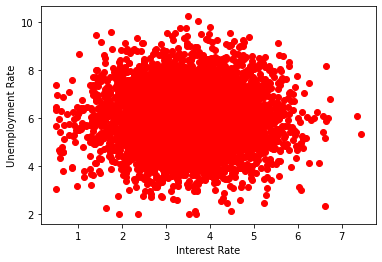

In [77]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

Text(0, 0.5, 'index_price')

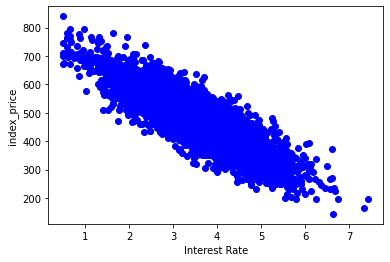

In [80]:
plt.scatter(df['interest_rate'],df['index_price'],color='b')
plt.xlabel("Interest Rate")
plt.ylabel("index_price")

Text(0, 0.5, 'index_price')

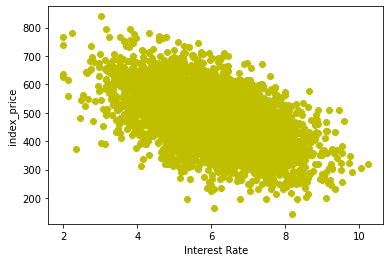

In [82]:
plt.scatter(df['unemployment_rate'],df['index_price'],color='y')
plt.xlabel("Interest Rate")
plt.ylabel("index_price")

## Seperating Feature for Dependent and Independent Features

In [83]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [87]:
X.head()

,interest_rate,unemployment_rate
0,4.00,5.49
1,3.36,5.46
2,4.15,3.85
3,5.02,5.60
4,3.27,6.88


In [88]:
y.head()

0    457.01
1    511.27
2    511.01
3    374.95
4    469.19
Name: index_price, dtype: float64

## Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25, random_state=42)

In [91]:
import seaborn as sns

C:\Users\Sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

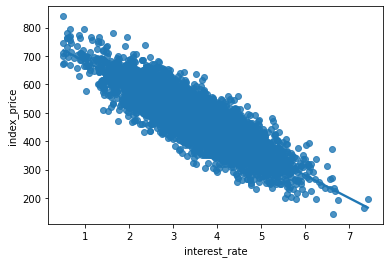

In [92]:
sns.regplot(df['interest_rate'],df['index_price'])

C:\Users\Sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index_price', ylabel='unemployment_rate'>

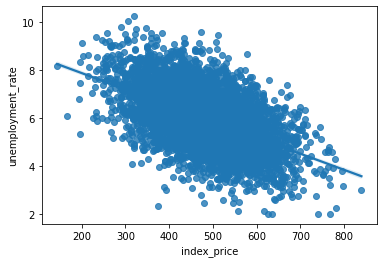

In [94]:
sns.regplot(df['index_price'],df['unemployment_rate'])

In [ ]:
sns.regplot(df['interest_rate'],df['unemployment_rate'])

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scalar = StandardScaler()

In [97]:
X_train = scalar.fit_transform(X_train)

In [98]:
X_test = scalar.transform(X_test)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
regression = LinearRegression()

In [103]:
regression.fit(X_train,y_train)

LinearRegression()

In [107]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv = 3)

In [108]:
validation_score

array([-24.61963751, -24.36690548, -25.4549072 ])

In [109]:
np.mean(validation_score)

-24.813816726865372

In [110]:
## Prediction

In [112]:
y_pred = regression.predict(X_test)
y_pred

array([582.05338265, 635.67806756, 374.29856978, ..., 495.12740935,
       505.59719169, 461.96037879])

## Performance Matrix

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [114]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

25.55846126915028
4.04045645852353
5.0555376834863255


## R Square
Formula

**R^2 = 1-SSR/SST**

R^2 = Coefficient of determination

SSR = sum of squares of residuals

SST = Total sum of Square

In [115]:
from sklearn.metrics import r2_score

In [116]:
score = r2_score(y_test,y_pred)
print(score)

0.9969801935213104


## Adjusted R Square

In [117]:
## Display Adjusted R-Sqared
1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.9969753502069901

## Assumption

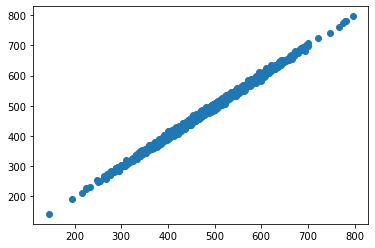

In [118]:
plt.scatter(y_test,y_pred)

In [121]:
residuals = y_test-y_pred
print(residuals)

1501    2.046617
2586    7.021932
2653    2.011430
1055   -3.639843
705    -3.578151
          ...   
4141   -2.735970
3168   -2.930492
2478    2.742591
4214    3.582808
4180    0.999621
Name: index_price, Length: 1250, dtype: float64


In [122]:
## Plot this residuals

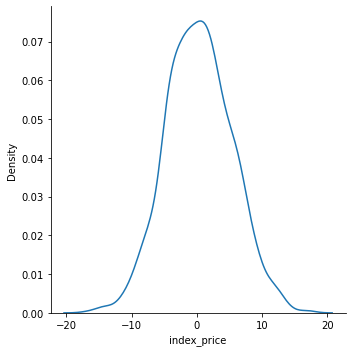

In [123]:
sns.displot(residuals,kind='kde')

In [124]:
## Scatter plot with predictions and residuals

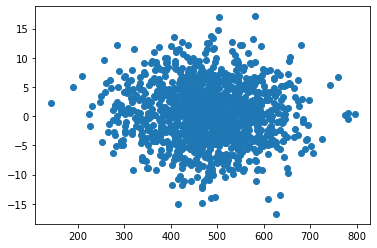

In [125]:
plt.scatter(y_pred,residuals)

## OLS Linear Regression

In [129]:
import statsmodels.api as sm

AttributeError: module 'numpy' has no attribute 'MachAr'

In [130]:
model = sm.OLS(y_train, X_train).fit()

AttributeError: module 'numpy' has no attribute 'MachAr'

In [131]:
prediction = model.predict(X_test)
print(prediction)

NameError: name 'model' is not defined

In [132]:
print(model.summary())

NameError: name 'model' is not defined

In [133]:
## Prediction for new data
regression.predict(scaler.transform([[92]]))

NameError: name 'scaler' is not defined